In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: partially initialized module 'pandas' has no attribute 'compat' (most likely due to a circular import)

In [2]:
# 1) karate club
g=nx.read_gml("karate.gml",label='id')

In [21]:
edgeList=[(1,2),(1,3),(2,4),(3,4),(3,5),(5,6),(5,7),(6,7),(3,8),(8,9),(9,10),(9,12),(9,11),(10,12),(10,11),(11,12),(11,13)]

In [3]:
graph=nx.Graph()
graph.add_edges_from(edgeList)

None


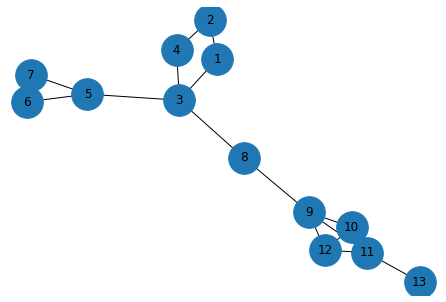

In [4]:
nx.draw(graph,with_labels=True,node_size=1000,edge_size=500)  # networkx draw()
print(plt.draw())  # pyplot draw()

In [5]:
bridges=list(nx.bridges(graph))
bridges

[(3, 5), (3, 8), (8, 9), (11, 13)]

In [6]:
cutVertices=list(nx.articulation_points(graph))
cutVertices

[5, 3, 11, 9, 8]

In [7]:
avgDegree=len(graph.edges())/len(graph.nodes())
print(avgDegree)

1.3076923076923077


In [8]:
avgDegreeCeiling=round(avgDegree+1)

In [9]:
list(graph.edges)

[(1, 2),
 (1, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 8),
 (5, 6),
 (5, 7),
 (6, 7),
 (8, 9),
 (9, 10),
 (9, 12),
 (9, 11),
 (10, 12),
 (10, 11),
 (12, 11),
 (11, 13)]

In [13]:
stp1Edges=[]
for i in range(len(cutVertices)):
    for j in cutVertices[i+1:]:
        if (cutVertices[i],j) not in list(graph.edges()):
            stp1Edges.append((cutVertices[i],j))

In [14]:
stp1Edges

[(5, 3), (5, 11), (5, 9), (5, 8), (3, 11), (3, 9), (11, 9), (11, 8), (9, 8)]

In [15]:
stp2Edges=[]
i=1
for k,v in bridges:
    e1=[('d'+str(i),k),('d'+str(i),v)]

    for e in e1:
        if e not in list(graph.edges()):
            stp2Edges.append(e)
    i+=1



In [16]:
stp2Edges

[('d1', 3),
 ('d1', 5),
 ('d2', 3),
 ('d2', 8),
 ('d3', 8),
 ('d3', 9),
 ('d4', 11),
 ('d4', 13)]

In [22]:
step7Edges=[]
for v in cutVertices:
    step7Edges.append(("V"+str(v),v))

if len(cutVertices)>1:
    step7_1Edges=[]
    for i in range(len(step7Edges)):
        if i==len(step7Edges)-1:
            step7_1Edges.append((step7Edges[i][0],step7Edges[0][0]))
        else:
            step7_1Edges.append((step7Edges[i][0],step7Edges[i+1][0]))
    step7Edges+=step7_1Edges





In [23]:
step7Edges

[('V5', 5),
 ('V3', 3),
 ('V11', 11),
 ('V9', 9),
 ('V8', 8),
 ('V5', 'V3'),
 ('V3', 'V11'),
 ('V11', 'V9'),
 ('V9', 'V8'),
 ('V8', 'V5')]

In [26]:
nodesGDegree=[x for x in list(graph.nodes) if len(graph.adj[x])>=avgDegreeCeiling]

In [32]:
step8EdgesPrep=[]

edgeCount=0
for i in range(len(nodesGDegree)):
    if edgeCount>=avgDegreeCeiling:
        break
    for node in nodesGDegree[i+1:]:
        if (nodesGDegree[i],node) not in graph.edges() and edgeCount<avgDegreeCeiling:
            step8EdgesPrep.append((nodesGDegree[i],node))
            edgeCount+=1
        elif edgeCount>=avgDegreeCeiling:
            break
    


In [33]:
step8EdgesPrep

[(1, 4), (1, 5)]

In [34]:
step8Edges=[]
dupNodes=[]
for a,b in step8EdgesPrep:
    if str(a)+'*' not in dupNodes:
        dupNodes.append(str(a)+"*")
        step8Edges+=[(str(a)+'*',a),(str(a)+'*',b)]
    else:
        dupNodes.append(str(b)+'*')
        step8Edges+=[(str(b)+"*",a),(str(b)+'*',b)]

In [35]:
step8Edges

[('1*', 1), ('1*', 4), ('5*', 1), ('5*', 5)]

In [40]:
def GraphAnon(edgeList):

    'executes graph anaonymization algorithm 1.'

    # graph creation

    graph=nx.Graph()

    graph.add_edges_from(edgeList)

    # 1. cut vertices

    cutVertices=list(nx.articulation_points(graph))

    # 2. bridges

    bridges=list(nx.bridges(graph))

    # 3. average degree

    avgDegree=len(graph.edges())/len(graph.nodes())

    degrees={}

    # frequency calculations
    nodes=list(graph.nodes)
    freq=[]
    for n in nodes:
        adjLength=len(list(graph.adj[n]))
        if str(adjLength) not in degrees.keys():
           degrees[str(adjLength)]=1
        elif adjLength in degrees.keys():
            degrees[str(adjLength)]+=1
        freqWeight=adjLength/len(nodes)
        freq.append(freqWeight)
    
    # maximum frequency

    freqMax=max(freq)


    if round(avgDegree)!=avgDegree:
        avgDegree=round(avgDegree+1)
    
    print("Executing Graph anonymization algorithm.")
    print('Bridges:',bridges)
    print("Cut Vertices:",cutVertices)
    
    # 4. Edges among cut vertices

    if len(cutVertices)!=0 :

        noMaxEdges=int((len(cutVertices)*(len(cutVertices)-1))/2)

        print('Executing step 4.')

        edgesAdded=0
        for i in range(len(cutVertices)):
            for j in cutVertices[i+1:]:
                if (cutVertices[i],j) not in list(graph.edges()) and edgesAdded<noMaxEdges:
                    graph.add_edge(cutVertices[i],j,createdAt='step4')
                    edgesAdded+=1
    
    # 5. New nodes for each bridge
    
    if len(bridges)!=0:

        print('Executing step 5.')
        i=1
        for k,v in bridges:
            e1=[('d'+str(i),k),('d'+str(i),v)]
            for e in e1:
                if e not in list(graph.edges()):
                    #stp2Edges.append(e)
                    graph.add_edge(e[0],e[1],createdAt='step5')
            i+=1
    
    # 6. Step6

    if len(cutVertices)==0 and len(bridges)!=0:

        print('Executing step 6.')

        for a,b in bridges:

            edgeToAdd=Step6(a=a,b=b,graph=graph,avgDegree=avgDegree,threshold=freqMax)

            if len(edgeAdd)!=0:
                graph.add_edge(edgeAdd[0],edgeAdd[1],createdaAt='step6')


    
    
    # 7.Duplicate nodes for cut vertices.

    if len(cutVertices)!=0 and len(bridges)==0:
        print('Executing step 7.')   

        step7Edges=[]
        for v in cutVertices:
            step7Edges.append(("V->a"+str(v),v))

        if len(cutVertices)>1:
            step7_1Edges=[]
            for i in range(len(step7Edges)):
                if i==len(step7Edges)-1:
                    step7_1Edges.append((step7Edges[i][0],step7Edges[0][0]))
                else:
                    step7_1Edges.append((step7Edges[i][0],step7Edges[i+1][0]))
            step7Edges+=step7_1Edges
        
        for a,b in step7Edges:
            graph.add_edge(a,b,createdAt="step7")
    

    # silencing cutvertices

    cVert=list(nx.articulation_points(graph))

    noEdgesAddMax=avgDegree

    

    for c in cVert:

        cAdjNodes=list(graph.adj[c])

        edgeFlag=0

        for cAdjNode in cAdjNodes:

            edgeAddC=Step6(a=c,b=cAdjNodes,avgDegree=avgDegree,threshold=freqMax,graph=graph)

            if len(edgeAddC)!=0 and edgeFlag<noEdgesAddMax:

                graph.add_edge(edgeAddC[0],edgeAddC[1],createdAt='SilenceCVert')
                graph.add_edge(edgeAddC[0],"V->"+str(c),createdAt="SilenceCVert")
                graph.add_edge(edgeAddC[1],'V->'+str(c),createdAt='SilenceCVert')

                edgeFlag+=1
    

    # 8. add edges among non adjacent nodes

    # if len(cutVertices)==0 and len(bridges)==0:

    #     print('Executing step 8.') 
        
    #     nodesGDegree=[x for x in list(graph.nodes) if len(graph.adj[x])>=avgDegree]

    #     step8EdgesPrep=[]

    #     edgeCount=0
    #     for i in range(len(nodesGDegree)):
    #         if edgeCount>=avgDegree:
    #             break
    #         for node in nodesGDegree[i+1:]:
    #             if (nodesGDegree[i],node) not in graph.edges() and edgeCount<avgDegree:
    #                 step8EdgesPrep.append((nodesGDegree[i],node))
    #                 edgeCount+=1
    #             elif edgeCount>=avgDegree:
    #                 break
        
    #     step8Edges=[]
    #     dupNodes=[]
    #     for a,b in step8EdgesPrep:
    #         if str(a)+'*' not in dupNodes:
    #             dupNodes.append(str(a)+"*")
    #             step8Edges+=[(str(a)+'*',a),(str(a)+'*',b)]
    #         else:
    #             dupNodes.append(str(b)+'*')
    #             step8Edges+=[(str(b)+"*",a),(str(b)+'*',b)]
        
    #     for a,b in step8Edges:
    #         graph.add_edge(a,b,createdAt="step8")
    
    return graph
    
    



    






    
                



    







In [34]:
edgeList=[(1,2),(1,3),(2,4),(3,4),(3,5),(5,6),(5,7),(6,7),(3,8),(8,9),(9,10),(9,12),(9,11),(10,12),(10,11),(11,12),(11,13)]
g=GraphAnon(edgeList=edgeList)

Executing Graph anonymization algorithm.
Bridges: [(3, 5), (3, 8), (8, 9), (11, 13)]
Cut Vertices: [5, 3, 11, 9, 8]
Executing step 4.
Executing step 5.


In [36]:
e1=list(g.edges())

In [37]:
g2=GraphAnon(e1)

Executing Graph anonymization algorithm.
Bridges: []
Cut Vertices: [5, 11, 3]
Executing step 4.
Executing step 7.


None


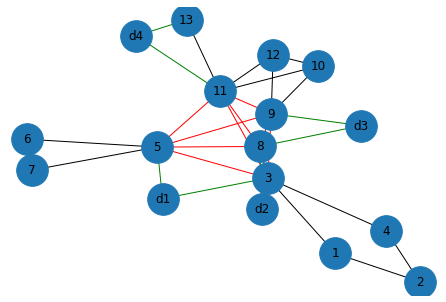

In [39]:
 # 2. edges

colorEdges=[]

nEdgesAdded=0
nEdgesAddedCutVert=0

for a,b,r in g.edges.data('createdAt'):
    if r==None:
        colorEdges.append('black')
    elif r=='step4':
        colorEdges.append('red')
        nEdgesAdded+=1
        nEdgesAddedCutVert+=1
    elif r=="step5":
        colorEdges.append('green')

    else:
        colorEdges.append("blue")
        nEdgesAdded+=1

    

    
nx.draw(g,with_labels=True,node_size=1000,edge_size=500,edge_color=colorEdges)  # networkx draw()
print(plt.draw())  # pyplot draw()

In [25]:
e2=GraphAnon(e1)

Executing Graph anonymization algorithm.
Bridges: [(11, 13)]
Cut Vertices: [5, 11, 3]
Executing step 4.


In [21]:
g1.nodes()

NodeView((1,))

In [16]:
def Step6(a,b,graph,threshold,avgDegree):

    'builds relationship based on neighbourhood'

    adjParent=list(graph.adj[a])
    adjNode=list(graph.adj[b])

    cond1NodesA=[x for x in adjParent if len(graph.adj[x])>=avgDegree]
    cond1NodesB=[x for x in adjNode if len(graph.adj[x])>=avgDegree]

    if len(cond1NodesA):
        cond1NodesA=adjParent

    if len(cond1NodesB):
        cond1NodesB=adjNode
    
    edgeAdd=()
    
    for parent in cond1NodesA:

        adjParent1=list(graph.adj[parent])

        for node in cond1NodesB:
            #print("".ljust(25,'*'))
            if node == parent:
                continue
            adjNode1=list(graph.adj[node])
            #commonNeighbours=[x for x in adjParent1 if x in adjNode1]
            commonNeighbours=list(set(adjParent1).intersection(adjNode1))
            try:            
                neighValue=len(commonNeighbours)/((len(adjParent1)-1)+(len(adjNode1)-1)-len(commonNeighbours))
            except ZeroDivisionError:
                continue
            if (parent,node) not in graph.edges() and parent !=node:
                if len(edgeAdd)==0:
                    edgeAdd=(parent,node,neighValue)
                elif len(edgeAdd)!=0 and neighValue<edgeAdd[2]:
                    edgeAdd=(parent,node,neighValue)
    
    return edgeAdd




In [22]:
# 2) dolphin dataset
g=nx.read_gml("dolphins.gml")


In [35]:
# 3) football dataset
g=nx.read_pajek("football.net")

In [50]:
# 4) citation network
edgeDF=pd.read_csv("citation.csv")
edgeList=[(edgeDF['1'][x],edgeDF['2'][x]) for x in range(len(edgeDF))]
g=nx.Graph()
g.add_edges_from(edgeList)

In [50]:
#5. Co-author network
g=nx.read_pajek("netsience.net")


In [7]:
len(edgeList)

2980

In [2]:
# 4) facebook network
edgeDF=pd.read_csv("facebook.csv")
edgeList=[(edgeDF['1'][x],edgeDF['2'][x]) for x in range(len(edgeDF))]
g=nx.Graph()
g.add_edges_from(edgeList)

In [3]:
edgeList=g.edges()
print(edgeList)

[(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 111), (1, 112), (1,

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

def CutVertices(edgeList):
    
    "creates a networkx graph with edgelist passed and return cut vertices."

    tStart=pd.Timestamp.now()

    graph=nx.Graph(edgeList)

    cutVertices=list(nx.articulation_points(graph))

    degrees={}

    # frequency calculations
    nodes=list(graph.nodes)
    freq=[]
    for n in nodes:
        adjLength=len(list(graph.adj[n]))
        if str(adjLength) not in degrees.keys():
           degrees[str(adjLength)]=1
        elif adjLength in degrees.keys():
            degrees[str(adjLength)]+=1
        freqWeight=adjLength/len(nodes)
        freq.append(freqWeight)
    
    # maximum frequency

    freqMax=max(freq)


    # first level relationships

    bridges=[]

    for i in range(len(cutVertices)):
        for j in cutVertices[i+1:]:
            if (cutVertices[i],j) not in graph.edges():
                graph.add_edge(cutVertices[i],j,typ="created1")
            else:
                bridges.append((cutVertices[i],j))

    
    # Build vertices by neighbourhood calculation

    for i in range(len(cutVertices)):
        for j in cutVertices[i+1:]:
            graph=Neighbourhood(cutVertices[i],j,graph,freqMax)



    # graph visualization

    # 1. nodes

    colorNodes=[]
    for node in graph.nodes():
        if node in cutVertices:
            colorNodes.append("red")
        else:
            colorNodes.append('green')
    
    # 2. edges

    colorEdges=[]

    nEdgesAdded=0
    nEdgesAddedCutVert=0

    for a,b,r in graph.edges.data('typ'):
        if r==None:
            colorEdges.append('black')
        elif r=='created1':
            colorEdges.append('yellow')
            nEdgesAdded+=1
            nEdgesAddedCutVert+=1
        else:
            colorEdges.append("blue")
            nEdgesAdded+=1
    
    

    
    nx.draw(graph,with_labels=True,node_size=1000,edge_size=500,node_color=colorNodes,edge_color=colorEdges)  # networkx draw()
    print(plt.draw())  # pyplot draw()

    tEnd=pd.Timestamp.now()

    timeTaken=(tEnd-tStart).seconds

    edgeLists={"Start":[x[0] for x in list(graph.edges)],"End":[x[1] for x in list(graph.edges)]}

    edgeListDF=pd.DataFrame(edgeLists)

    return cutVertices,len(cutVertices),nEdgesAddedCutVert,degrees,freqMax,nEdgesAdded,bridges,edgeListDF,timeTaken




In [11]:
def Neighbourhood(a,b,graph,threshold,avgDegree):
    'builds relationship based on neighbourhood'

    adjParent=list(graph.adj[a])
    adjNode=list(graph.adj[b])
    # print(adjParent)
    # print(adjNode)

    for parent in adjParent:
        adjParent1=list(graph.adj[parent])
        for node in adjNode:
            #print("".ljust(25,'*'))
            if node == parent:
                continue
            adjNode1=list(graph.adj[node])
            #commonNeighbours=[x for x in adjParent1 if x in adjNode1]
            commonNeighbours=list(set(adjParent1).intersection(adjNode1))
            try:            
                neighValue=len(commonNeighbours)/((len(adjParent1)-1)+(len(adjNode1)-1)-len(commonNeighbours))
            except ZeroDivisionError:
                continue
            # print("C^uv:",len(commonNeighbours))
            # print("degree of %d:"%parent,len(adjParent1))
            # print('degree of %d'%node,len(adjNode1))
            # print('neigh value:',neighValue)
            if (parent,node) not in graph.edges() and parent !=node and neighValue<threshold and len(adjNode1)>=avgDegree and len(adjParent1)>=avgDegree:
                graph.add_edge(parent,node,createdAt="step 6")
                #print(len(adjNode))
                #print("(%s,%s)->"%(str(parent),str(node)),neighValue)
    
    return graph




In [6]:
# Algorithm Execution
cutV,lCutV,nEdgeCutV,degrees,freqMax,nEdges,bridges,eDF,timeTaken=CutVertices(edgeList)

# cutvertices
print(cutV)

KeyboardInterrupt: 

In [41]:
# Number of cutvertices
lCutV

3

In [42]:
# Number of nodes in each degree
degrees

{'4': 1,
 '18': 1,
 '19': 1,
 '8': 1,
 '13': 1,
 '12': 1,
 '6': 1,
 '10': 1,
 '7': 1,
 '3': 1,
 '9': 1,
 '5': 1,
 '1': 1,
 '2': 1}

In [43]:
# maximum frequency
freqMax

0.5428571428571428

In [44]:
# edgelist into csv
eDF.to_csv("edgeList.csv")

In [45]:
# timetaken for running the algorithm
timeTaken

0

In [46]:
# number of edges between cut vertices
nEdgeCutV

3

In [47]:
# number of edges added
nEdges

182

In [49]:
# bridges
bridges

[]